In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.shape

(768, 9)

In [17]:
X = df.drop('Outcome' , axis =1)
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [28]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


ValueError: ignored

In [32]:
import torch.utils.data as data_utils

In [45]:
target = torch.FloatTensor(df['Outcome'].values)
features = torch.FloatTensor(df.drop('Outcome', axis = 1).values)

train = data_utils.TensorDataset(features, target)
train_loader = data_utils.DataLoader(train, batch_size=10, shuffle=True)

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=0)

In [56]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
#y_train=torch.LongTensor(y_train)
#y_test=torch.LongTensor(y_test)

y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)

In [57]:
X_train.shape

torch.Size([614, 8])

In [104]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,hidden3 = 10 ,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        

        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [105]:
torch.manual_seed(20)
model=ANN_Model()

In [106]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [107]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [108]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.45721173286438
Epoch number: 11 and the loss : 0.8019213080406189
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.591776967048645
Epoch number: 41 and the loss : 0.5679706931114197
Epoch number: 51 and the loss : 0.5529038906097412
Epoch number: 61 and the loss : 0.5410096049308777
Epoch number: 71 and the loss : 0.5310390591621399
Epoch number: 81 and the loss : 0.5220360159873962
Epoch number: 91 and the loss : 0.5135970115661621
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.49834105372428894
Epoch number: 121 and the loss : 0.4960547685623169
Epoch number: 131 and the loss : 0.4828638434410095
Epoch number: 141 and the loss : 0.47560372948646545
Epoch number: 151 and the loss : 0.4833466112613678
Epoch number: 161 and the loss : 0.4882737398147583
Epoch number: 171 and the loss : 0.46933722496032715
Epoch number: 181 and the loss : 0.4662606418132782
Epoch number: 191 and t

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

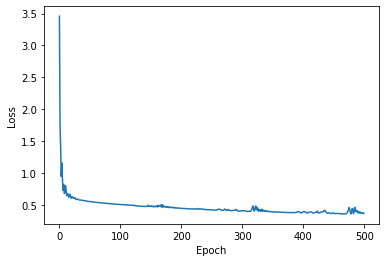

In [110]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [111]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [112]:
# testing model on a new data point
a = list(df.iloc[0,:-1])

In [81]:
a = [8.0, 147.0, 72.0, 35.0, 0.0, 36.6, 0.627, 48.0]

In [113]:
new_data_point = torch.tensor(a)

In [87]:
with torch.no_grad():
    print(model(new_data_point))
    print(model(new_data_point).argmax().item())
    a = model(new_data_point).argmax().item()
    if a == 1: 
      print('Diabetic')
    else:
      print('No diabetic')


tensor([-4.3393, -2.8435])
1
Diabetic


In [114]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[94, 13],
       [17, 30]])

In [115]:
import seaborn as sns

Text(69.0, 0.5, 'Predicted Values')

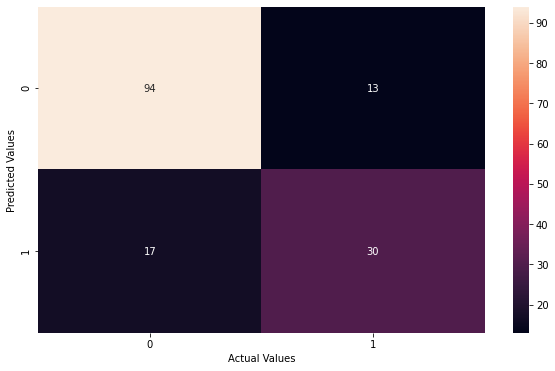

In [116]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [117]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.8051948051948052

In [118]:
torch.save(model,'diabetes.pt')

In [119]:
model=torch.load('diabetes.pt')

In [120]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)